# La distribución muestral

En esta lección vamos a introducir el concepto de la distribución muestral (o distribución de la muestra) que servirá como punto de partida para métricas que nos permitirán cuantificar la confiabilidad de las estimaciones que hagamos sobre los datos a partir de las muestras recolectadas.

Así que para entender este concepto de la definición muestral comenzaremos con un sencillo ejemplo numérico, después de lo cual veremos la definición formal y los principales usos de este concepto en la Ciencia de Datos y el Machine Learning.

Y al final cerraremos con los principales aspectos a tener en cuenta al momento de usar distribuciones muestrales para analizar nuestros datos.

## 1. Ejemplo numérico

Comencemos con un ejemplo que nos permitirá entender la idea básica de lo que es la distribución muestral.

Supongamos un caso hipotético: tenemos una población que contiene los números enteros del 1 al 100.

Podemos simular esta población usando NumPy:

In [12]:
# Población: 100 datos (números del 1 al 100)
import numpy as np

pob = np.arange(20,150,3)
print(pob)

# Imprimir la media de la población
print(pob.mean())
print(np.median(pob))
muestra=np.random.choice(pob, size=30, replace=False)
muestra
print(np.mean(muestra))
print(np.median(muestra))


[ 20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71
  74  77  80  83  86  89  92  95  98 101 104 107 110 113 116 119 122 125
 128 131 134 137 140 143 146 149]
84.5
84.5
84.9
84.5


Ahora hagamos el siguiente ejercicio: realizemos un muestreo aleatorio (con un tamaño de muestra n=30) un total de 100 veces. Para cada una de estas muestras vamos a imprimir en pantalla el valor de la media:

In [ ]:
# Muestreo aleatorio (n=30). Para cada muestra imprimir en pantalla la media (estimación)
# por defecto choice devuelve una muestra con elementos repetidos con replace por defecto en true
n = 30
trials = 100
pob = np.arange(0,101)
proms_muestras = np.zeros((trials))
print(proms_muestras.shape)
for i in range(trials):
    # Tomar muestra
    muestra = np.random.choice(pob, size=n)
    #print(f'muestra {i}:{muestra}')
    # Imprimir estimación de la media
    print(f'Muestra {i+1}: {muestra.mean():.2f}')
    
    # Almacenar resultado
    proms_muestras[i] = muestra.mean()

(100,)
Muestra 1: 51.10
Muestra 2: 51.40
Muestra 3: 44.77
Muestra 4: 42.57
Muestra 5: 42.43
Muestra 6: 45.33
Muestra 7: 54.77
Muestra 8: 52.97
Muestra 9: 54.50
Muestra 10: 41.87
Muestra 11: 52.40
Muestra 12: 48.63
Muestra 13: 46.63
Muestra 14: 43.97
Muestra 15: 52.13
Muestra 16: 39.57
Muestra 17: 48.97
Muestra 18: 57.90
Muestra 19: 49.10
Muestra 20: 53.37
Muestra 21: 54.30
Muestra 22: 44.80
Muestra 23: 53.97
Muestra 24: 49.90
Muestra 25: 51.00
Muestra 26: 49.40
Muestra 27: 46.00
Muestra 28: 55.73
Muestra 29: 37.70
Muestra 30: 51.20
Muestra 31: 53.10
Muestra 32: 48.37
Muestra 33: 52.17
Muestra 34: 45.57
Muestra 35: 52.83
Muestra 36: 48.13
Muestra 37: 49.13
Muestra 38: 44.80
Muestra 39: 49.87
Muestra 40: 49.07
Muestra 41: 53.87
Muestra 42: 55.13
Muestra 43: 40.67
Muestra 44: 42.83
Muestra 45: 50.87
Muestra 46: 59.60
Muestra 47: 44.67
Muestra 48: 46.33
Muestra 49: 46.87
Muestra 50: 43.70
Muestra 51: 59.77
Muestra 52: 47.50
Muestra 53: 49.53
Muestra 54: 55.73
Muestra 55: 58.43
Muestra 56: 

In [26]:
proms_muestras

array([51.1       , 51.4       , 44.76666667, 42.56666667, 42.43333333,
       45.33333333, 54.76666667, 52.96666667, 54.5       , 41.86666667,
       52.4       , 48.63333333, 46.63333333, 43.96666667, 52.13333333,
       39.56666667, 48.96666667, 57.9       , 49.1       , 53.36666667,
       54.3       , 44.8       , 53.96666667, 49.9       , 51.        ,
       49.4       , 46.        , 55.73333333, 37.7       , 51.2       ,
       53.1       , 48.36666667, 52.16666667, 45.56666667, 52.83333333,
       48.13333333, 49.13333333, 44.8       , 49.86666667, 49.06666667,
       53.86666667, 55.13333333, 40.66666667, 42.83333333, 50.86666667,
       59.6       , 44.66666667, 46.33333333, 46.86666667, 43.7       ,
       59.76666667, 47.5       , 49.53333333, 55.73333333, 58.43333333,
       45.16666667, 41.86666667, 52.1       , 46.        , 42.43333333,
       43.66666667, 45.6       , 54.66666667, 50.        , 54.23333333,
       48.43333333, 53.4       , 56.83333333, 54.86666667, 49.83

Podemos observar que, como era de esperar, los promedios oscilan alrededor de la media de la población (50.5) pero nunca llegarán a ser iguales.

Además, estos promedios tendrán variaciones aleatorias alrededor de ese valor central ideal, así que podemos dibujarlos por ejemplo a través de un histograma:

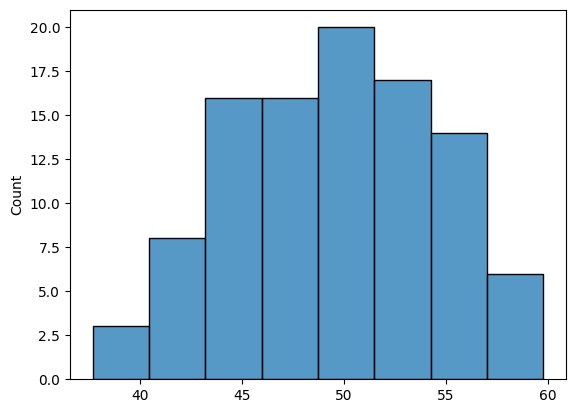

In [27]:
# Dibujar distribución de los promedios
import seaborn as sns

sns.histplot(proms_muestras);

¡Y la gráfica anterior es precisamente una distribución muestral!

Podemos usar la misma idea anterior pero en lugar de la media podemos estimar, por ejemplo, la desviación estándar. En lugar de imprimir cada valor dibujaremos la distribución de estas desviaciones calculadas a partir de cada muestra:

[26.66018671 33.98576499 28.14054015 26.67283262 27.31861392 30.41763012
 31.92604301 25.81334711 25.74716813 23.95375174 29.03599299 25.40124669
 30.13718633 31.21824609 29.54508795 27.04705776 32.80115174 31.78986561
 25.95057268 30.97348328 26.14466166 31.22790775 27.04705776 23.93268337
 28.68350281 30.03597843 30.6127243  28.97884286 29.0226157  28.67993879
 29.54206041 32.69325449 28.03085601 29.48483603 28.77346386 26.32227616
 25.17320003 31.41940306 26.27664785 33.72338457 28.839325   25.66287851
 28.44480034 28.37567425 28.24621902 30.69239862 26.84111688 28.75453587
 33.36498497 31.47245709 27.77778889 21.63343606 29.87745341 24.61049911
 27.38531642 30.2735675  29.45610671 31.78189562 24.89221208 28.19773435
 24.01305201 27.04900902 32.69243881 24.78720548 27.4245632  28.03705881
 31.84596608 27.08318461 26.73260598 31.34044246 29.40689639 29.63048355
 28.21150278 33.91926689 25.67324591 24.98730789 25.66339806 26.38368604
 27.28662676 28.2933836  31.69558329 27.90382292 28

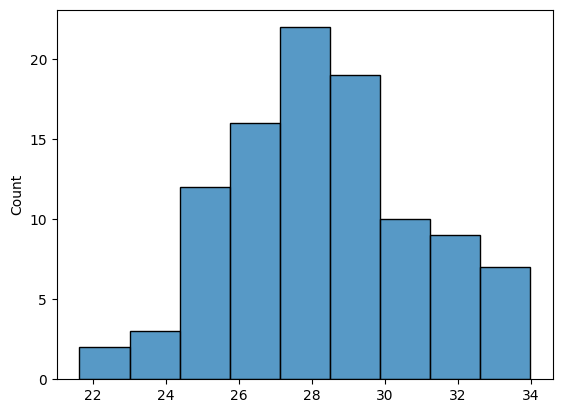

In [30]:
# Muestreo aleatorio (n=30). Para cada muestra imprimir en pantalla la desviación de la muestra (estimación)
n = 30
trials = 100

distr_muestr = np.zeros((trials,))

# Calcular desviación para cada muestra y almacenarla
for i in range(trials):
    # Tomar muestra
    muestra = np.random.choice(pob, n)
        
    # Almacenar resultado
    distr_muestr[i] = muestra.std()
    
# Graficar distribución de las desviaciones de las muestras
sns.histplot(distr_muestr);
print(distr_muestr)
# Imprimir el valor de referencia: la desviación de la población
print(f'Desviación de la población: {pob.std():.3f}')

In [33]:
import pandas as pd
df=pd.Series(distr_muestr)
df.describe()

count    100.000000
mean      28.367392
std        2.569078
min       21.633436
25%       26.628683
50%       28.204619
75%       29.917085
max       33.985765
dtype: float64

<Axes: >

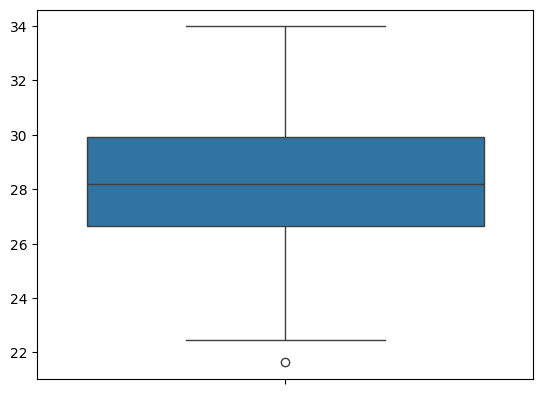

In [35]:
sns.boxplot(df)

Y de nuevo vemos que los valores de las desviaciones oscilan alrededor del valor de la población (28.8) y que al generar la gráfica (histograma) tendremos ¡otra distribución muestral!

Con esto ya estamos listos para definir ahora sí el concepto.

## 2. Definición de la distribución muestral (o distribución de la muestra)

Comencemos definiendo el término "estadística de la muestra":

<p></p>
<div style="background-color: #F7CAC9; color: black; padding: 10px;">
    La <b>estadística de la muestra</b> es el parámetro estadístico (media, desviación, mediana, rango intercuartiles, etc.) que usaremos para caracterizar la muestra
</div>

Y con esto ahora sí podemos definir la distribución muestral:

<p></p>
<div style="background-color: #F7CAC9; color: black; padding: 10px;">
    La <b>distribución muestral</b> es la distribución de frecuencias/probabilidades que tendrá la estadística de la muestra cuando la calculamos para múltiples muestras de la población
</div>

Así que para obtener la distribución muestral:

1. Tomamos múltiples muestras de tamaño "n" de la población
2. Por cada muestra calculamos su estadística (media, desviación, mediana, etc.) y almacenamos el resultado
3. Generamos un gráfico para ver la frecuencia o la distribución de estos valores de la estadística

## 3. Usos de la distribución muestral

1. Como veremos en las próximas lecciones, la distribución muestral es un concepto que nos servirá como punto de partida para medir la confiabilidad de nuestro análisis estadístico

2. Además, en Machine Learning, podemos usar la distribución muestral para caracterizar el comportamiento de un modelo: por ejemplo podemos generar la distribución muestral de la exactitud y tener una idea de qué tan exacto será el modelo una vez lo comencemos a generar predicciones con el mismo.

## 4. Aspectos a tener en cuenta

1. La distribución muestral es la distribución que tendrán las frecuencias o probabilidades de la estadística que calculemos a partir de las muestras que tomemos de la población original.
2. Esta estadística puede ser la media, la desviación estándar, la mediana o cualquier otra, aunque convencionalmente se usa la media (como veremos en las próximas lecciones).
3. La distribución muestral nos permitirá entender el teorema del límite central (el tema de la próxima lección) y también los conceptos de error estándar e intervalos de confianza, que nos permitirán medir el grado de fiabilidad de las estimaciones que hagamos a partir de las muestras.